In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import shutil
import re

## 

## 1.C

In [3]:
current_path= Path().absolute()         # current path
test_path= current_path/"test"/"test"   # path to the test data
train_path= current_path/"train"/"train"    # path to train data

In [4]:
new_folder_path= current_path/ "original_data"
new_folder_path.mkdir(exist_ok=True)

In [5]:
if test_path.exists():
    shutil.move(test_path, new_folder_path)
if train_path.exists():
    shutil.move(train_path, new_folder_path)

## 1.A/B

In [6]:
original_data= current_path/"original_data" # path original data
test_data= original_data/"test" # new test data
train_data= original_data/"train"   # new train data

In [26]:
train_list= list(train_data.iterdir())  # tuple of the image paths
pictures= np.random.choice(train_list, 10)  # ten random paths

array([WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/cat.2830.jpg'),
       WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/dog.4215.jpg'),
       WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/cat.7179.jpg'),
       WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/cat.6433.jpg'),
       WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/dog.6901.jpg'),
       WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/dog.10555.jpg'),
       WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2-Milton-OPA23/labb_2/original_data/train/cat.2541.jpg'),
       WindowsPath('c:/Users/milto/Documents/skola/Artificial_Intelligence2

In [34]:
pattern = r"\b\w{3}\b"  # pattern for dog or cat
labels = [re.findall(pattern, path.name)[0] for path in pictures]   # regx to find pattern in the file name of the path 0 to take name and not jpg (first match)

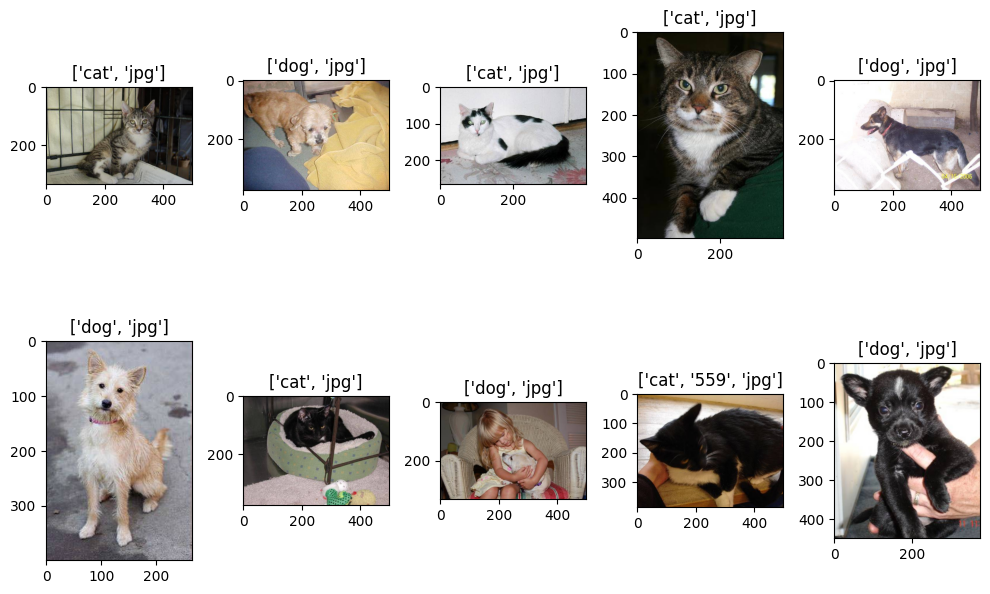

In [35]:


fig, axes= plt.subplots(2, 5, figsize= (10,7))       
for i, ax in enumerate(axes.flatten()):
    image_path= train_data/f"{pictures[i]}"   # image math for the current number in the list
    image= plt.imread(image_path)       # reads as image
    ax.imshow(image)                    # showing image
    ax.set_title(labels[i])
    
fig.tight_layout()  

## 1.D